# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.dropna(inplace=True)

In [6]:
df['pclass'].unique()

array([1, 3, 2], dtype=int64)

In [7]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

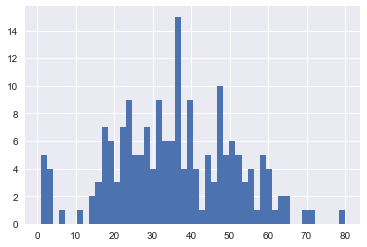

In [10]:
df['age'].hist(bins=50);

## Data Pre-processing

In [11]:
X = df[['pclass', 'sex', 'age']]

In [12]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [13]:
X['sex'] = lb.fit_transform(X['sex'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [15]:
X.shape

(182, 3)

In [16]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
pclass    182 non-null int64
sex       182 non-null int32
age       182 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 10.0 KB


In [18]:
y = df['survived']

In [19]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

# Fit Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [21]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

## Decision Tree

In [41]:
clf = DecisionTreeClassifier(random_state=42)

In [42]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [43]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9528

Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.93      0.93        42
          1       0.96      0.96      0.96        85

avg / total       0.95      0.95      0.95       127


Confusion Matrix: 
 [[39  3]
 [ 3 82]]

Average Accuracy: 	 0.7724
Accuracy SD: 		 0.1018


In [44]:
print_score(clf, X_train, y_train, X_test, y_test, train=False) # Test

Test Result:

accuracy score: 0.7636

Classification Report: 
              precision    recall  f1-score   support

          0       0.62      0.59      0.61        17
          1       0.82      0.84      0.83        38

avg / total       0.76      0.76      0.76        55


Confusion Matrix: 
 [[10  7]
 [ 6 32]]



***